Data clean

In [1]:
# System and File Handling
import os
import shutil
import random

# Data Handling
import numpy as np
from sklearn.model_selection import train_test_split

# Deep Learning (Keras & TensorFlow)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Plotting (Optional)
import matplotlib.pyplot as plt


In [2]:
import os

# Count images in each folder
elephant_dir = "Data Set"
nonelephant_dir = "Not Data Set"

elephant_count = len(os.listdir(elephant_dir))
nonelephant_count = len(os.listdir(nonelephant_dir))

print(f"🐘 Elephant images: {elephant_count}")
print(f"🚫 Non-elephant images: {nonelephant_count}")


🐘 Elephant images: 1441
🚫 Non-elephant images: 1441


In [3]:
import random

def balance_dataset(folder1, folder2):
    count1 = len(os.listdir(folder1))
    count2 = len(os.listdir(folder2))
    min_count = min(count1, count2)

    for folder in [folder1, folder2]:
        all_files = os.listdir(folder)
        if len(all_files) > min_count:
            remove_files = random.sample(all_files, len(all_files) - min_count)
            for file in remove_files:
                os.remove(os.path.join(folder, file))

    print(f"✅ Both folders now have {min_count} images")

# Call to balance
balance_dataset(elephant_dir, nonelephant_dir)


✅ Both folders now have 1441 images


In [4]:
import os
import pandas as pd
import random

def create_labeled_dataset(elephant_dir, nonelephant_dir):
    data = []

    # Label elephant images as 1
    for file in os.listdir(elephant_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append((os.path.join(elephant_dir, file), 1))

    # Label non-elephant images as 0
    for file in os.listdir(nonelephant_dir):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append((os.path.join(nonelephant_dir, file), 0))

    # Shuffle the data
    random.shuffle(data)

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=["image_path", "label"])
    return df

# Call the function
df = create_labeled_dataset(elephant_dir, nonelephant_dir)

# Show few rows
print(df.head())


                      image_path  label
0  Not Data Set\clothes_1323.jpg      0
1  Not Data Set\clothes_4993.jpg      0
2  Not Data Set\clothes_3474.jpg      0
3  Data Set\9a6d8feba040b148.jpg      1
4   Not Data Set\clothes_899.jpg      0


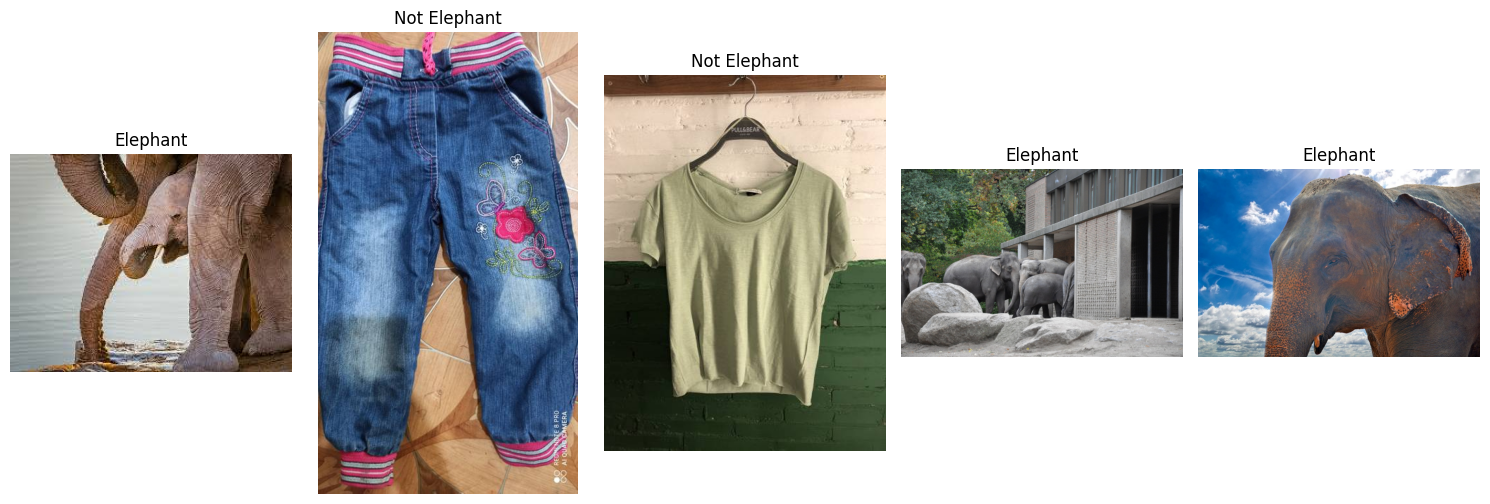

In [5]:
import matplotlib.pyplot as plt
import cv2

# Define class names
class_names = {0: "Not Elephant", 1: "Elephant"}

def show_random_images(df, n=5):
    # Select n random rows
    sample_df = df.sample(n)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, (path, label) in enumerate(zip(sample_df["image_path"], sample_df["label"])):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call function
show_random_images(df, n=5)


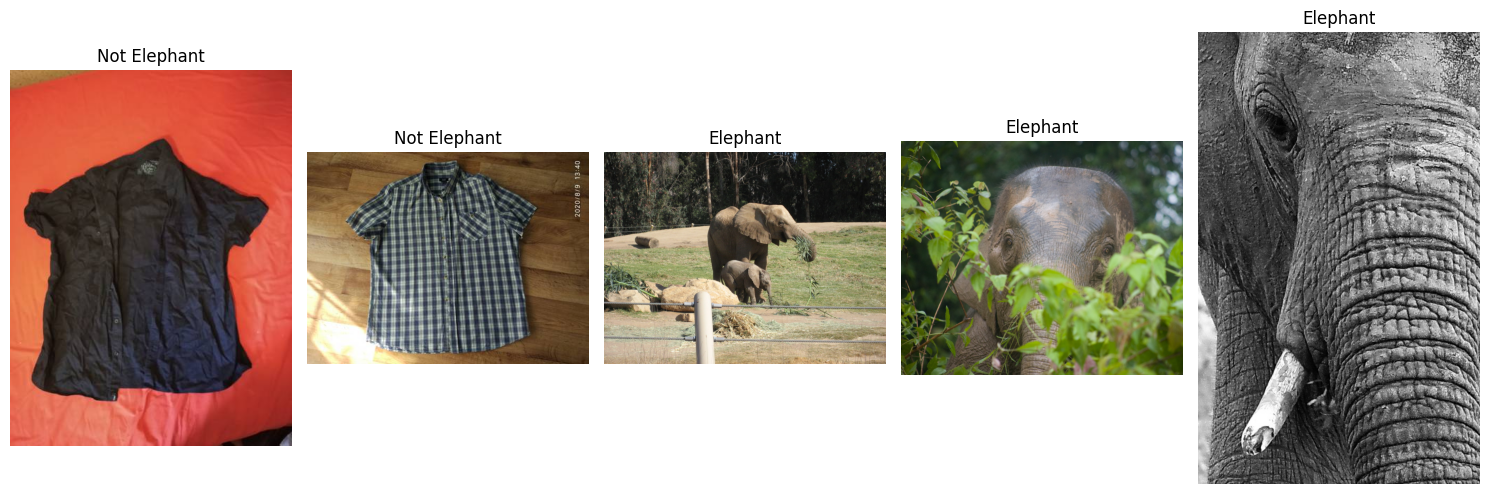

Training data size: 2305
Testing data size: 577


In [6]:
import os
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define class names
class_names = {0: "Not Elephant", 1: "Elephant"}

def create_labeled_dataset(elephant_dir, nonelephant_dir):
    data = []
    
    # Check if directories exist
    if not os.path.isdir(elephant_dir):
        raise FileNotFoundError(f"Elephant directory {elephant_dir} does not exist.")
    if not os.path.isdir(nonelephant_dir):
        raise FileNotFoundError(f"Non-elephant directory {nonelephant_dir} does not exist.")

    # Label elephant images as 1
    for file in os.listdir(elephant_dir):
        file_path = os.path.join(elephant_dir, file)
        if file.lower().endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(file_path):
            data.append((file_path, 1))

    # Label non-elephant images as 0
    for file in os.listdir(nonelephant_dir):
        file_path = os.path.join(nonelephant_dir, file)
        if file.lower().endswith(('.jpg', '.jpeg', '.png')) and os.path.isfile(file_path):
            data.append((file_path, 0))

    # Shuffle the data
    random.shuffle(data)

    # Convert to DataFrame
    df = pd.DataFrame(data, columns=["image_path", "label"])
    return df

def show_random_images(df, n=5):
    # Select n random rows
    sample_df = df.sample(n)

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, (path, label) in enumerate(zip(sample_df["image_path"], sample_df["label"])):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_names[label])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
elephant_dir = "Data Set"
nonelephant_dir = "Not Data Set"

# Create labeled dataset
df = create_labeled_dataset(elephant_dir, nonelephant_dir)

# Show a few random images with labels
show_random_images(df, n=5)

# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Show the sizes of the splits
print(f"Training data size: {len(train_df)}")
print(f"Testing data size: {len(test_df)}")


Epoch 1/10
73/73 [==============================] - 249s 3s/step - loss: 0.5924 - accuracy: 0.7132 - val_loss: 0.2903 - val_accuracy: 0.8908
Epoch 2/10
73/73 [==============================] - 147s 2s/step - loss: 0.3165 - accuracy: 0.8625 - val_loss: 0.2083 - val_accuracy: 0.9081
Epoch 3/10
73/73 [==============================] - 155s 2s/step - loss: 0.2027 - accuracy: 0.9171 - val_loss: 0.2897 - val_accuracy: 0.8683
Epoch 4/10
73/73 [==============================] - 165s 2s/step - loss: 0.1644 - accuracy: 0.9380 - val_loss: 0.1433 - val_accuracy: 0.9341
Epoch 5/10
73/73 [==============================] - 163s 2s/step - loss: 0.0982 - accuracy: 0.9662 - val_loss: 0.1662 - val_accuracy: 0.9497
Epoch 6/10
73/73 [==============================] - 147s 2s/step - loss: 0.0698 - accuracy: 0.9740 - val_loss: 0.1846 - val_accuracy: 0.9307
Epoch 7/10
73/73 [==============================] - 141s 2s/step - loss: 0.0494 - accuracy: 0.9818 - val_loss: 0.2000 - val_accuracy: 0.9359
Epoch 8/10
73

c:\Users\Dee\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


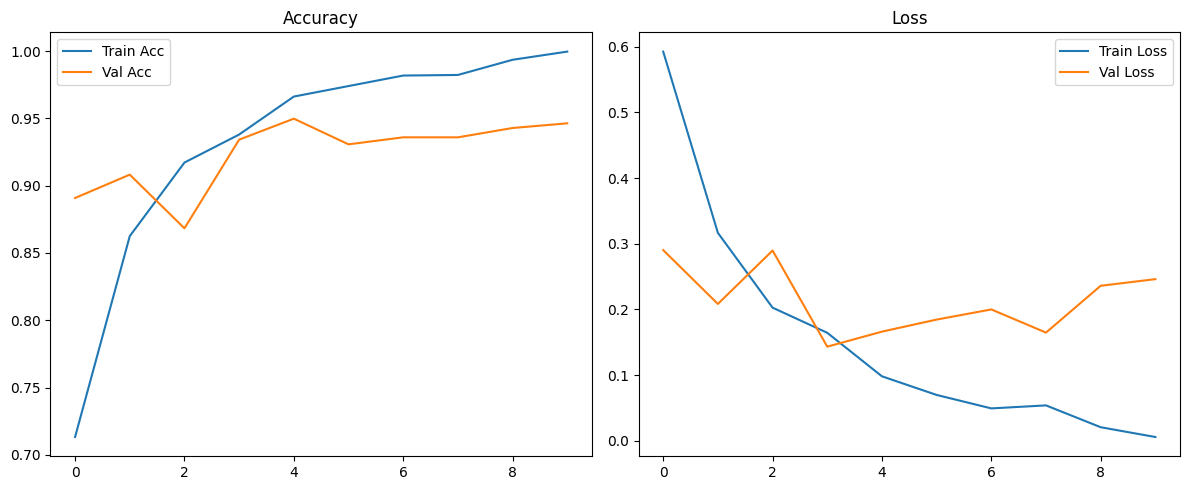

In [7]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Image size and batch size
IMG_SIZE = (224, 224)

# Function to load and preprocess images
def load_images(df):
    images = []
    labels = []

    for i, row in df.iterrows():
        path = row['image_path']
        label = row['label']

        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, IMG_SIZE)
            img = img / 255.0  # Normalize
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_images(train_df)
X_test, y_test = load_images(test_df)

# CNN Model
def build_model(input_shape=(224, 224, 3)):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

# Save model
model.save("elephant_detection_model.h5")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 275ms/step


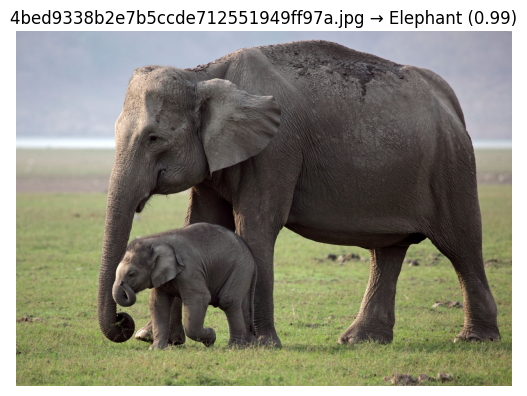

1/1 [==============================] - 0s 60ms/step


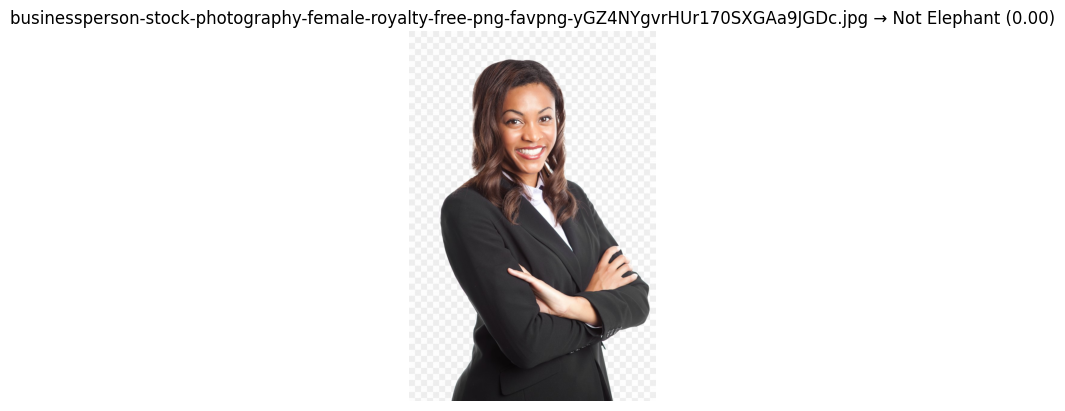

1/1 [==============================] - 0s 33ms/step


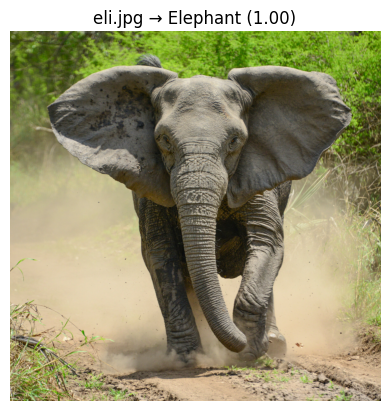

1/1 [==============================] - 0s 44ms/step


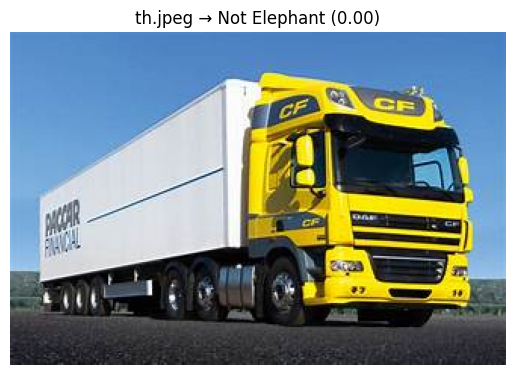

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from shutil import copy

# Load trained model
model = load_model("elephant_detection_model.h5")

# Class names
class_names = {0: "Not Elephant", 1: "Elephant"}

# Image settings
image_size = (224, 224)
test_dir = "pics"  # Your test folder with unlabeled images

# Output folders
output_dir_elephant = "Predicted_Elephants"
output_dir_nonelephant = "Predicted_Not_Elephants"

# Create folders if they don't exist
os.makedirs(output_dir_elephant, exist_ok=True)
os.makedirs(output_dir_nonelephant, exist_ok=True)

# Function to predict a single image
def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, image_size)
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    prediction = model.predict(img_array)
    class_id = 1 if prediction[0][0] >= 0.5 else 0

    return class_id, prediction[0][0], img_rgb

# Predict all images in the folder
for file in os.listdir(test_dir):
    file_path = os.path.join(test_dir, file)
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        class_id, prob, img_rgb = predict_single_image(file_path)

        # Show result
        plt.imshow(img_rgb)
        plt.title(f"{file} → {class_names[class_id]} ({prob:.2f})")
        plt.axis('off')
        plt.show()

        # Copy to appropriate folder
        if class_id == 1:
            copy(file_path, os.path.join(output_dir_elephant, file))
        else:
            copy(file_path, os.path.join(output_dir_nonelephant, file))


In [1]:
import os
import shutil

# Paths to your two datasets
dataset1_path = 'Data Set'  # First dataset (e.g., original training set)
dataset2_path = 'Not Data Set'  # Second dataset (e.g., original testing set)
combined_path = 'combined_dataset'

# Classes
categories = ['elephant', 'non_elephant']

# Create combined directories
for category in categories:
    dest_dir = os.path.join(combined_path, category)
    os.makedirs(dest_dir, exist_ok=True)

    # Copy from dataset1
    dataset1_dir = os.path.join(dataset1_path, category)
    if os.path.exists(dataset1_dir):
        for filename in os.listdir(dataset1_dir):
            src = os.path.join(dataset1_dir, filename)
            dst = os.path.join(dest_dir, f"ds1_{filename}")
            shutil.copy2(src, dst)

    # Copy from dataset2
    dataset2_dir = os.path.join(dataset2_path, category)
    if os.path.exists(dataset2_dir):
        for filename in os.listdir(dataset2_dir):
            src = os.path.join(dataset2_dir, filename)
            dst = os.path.join(dest_dir, f"ds2_{filename}")
            shutil.copy2(src, dst)

print("✅ Combined dataset created in 'combined_dataset/'")


✅ Combined dataset created in 'combined_dataset/'


C:\Users\Dee\AppData\Local\Temp\ipykernel_21080\3067068017.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')


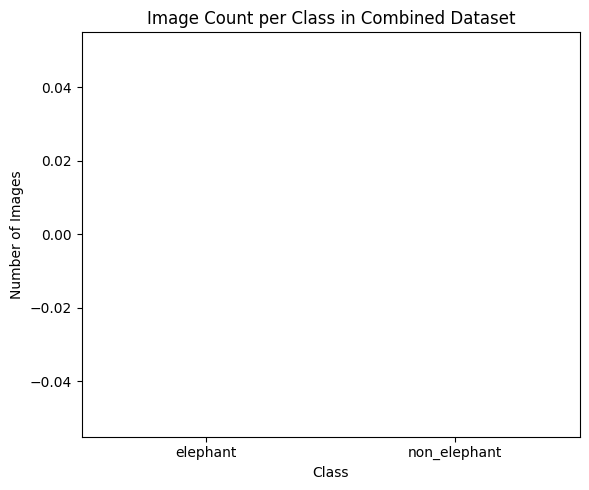

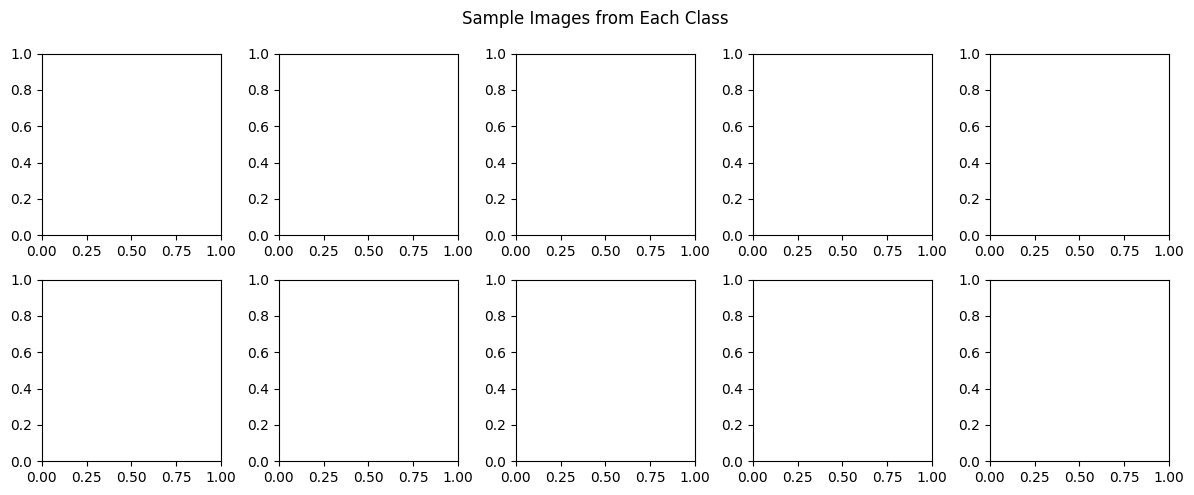

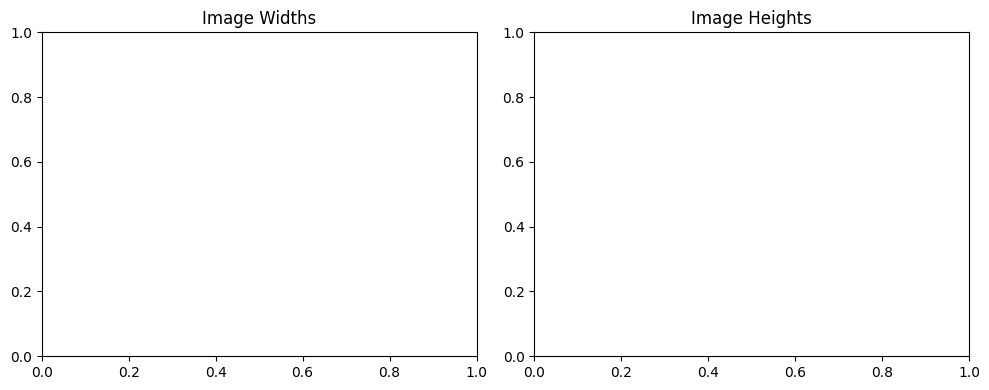

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

combined_path = 'combined_dataset'
categories = ['elephant', 'non_elephant']

# Count images per class
class_counts = {category: len(os.listdir(os.path.join(combined_path, category)))
                for category in categories}

# Plot 1: Bar plot of class distribution
plt.figure(figsize=(6, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='viridis')
plt.title('Image Count per Class in Combined Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

# Plot 2: Display few sample images from each class
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Images from Each Class")

for i, category in enumerate(categories):
    img_dir = os.path.join(combined_path, category)
    images = os.listdir(img_dir)[:5]
    for j, img_name in enumerate(images):
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 2:
            axes[i, j].set_title(category)

plt.tight_layout()
plt.savefig("sample_images.png")
plt.show()

# Optional Plot 3: Image dimension analysis
img_widths = []
img_heights = []

for category in categories:
    img_dir = os.path.join(combined_path, category)
    for img_name in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_name)
        try:
            img = Image.open(img_path)
            w, h = img.size
            img_widths.append(w)
            img_heights.append(h)
        except:
            continue

# Plot 3: Distribution of image widths and heights
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(img_widths, kde=True, color='blue')
plt.title("Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(img_heights, kde=True, color='green')
plt.title("Image Heights")

plt.tight_layout()
plt.savefig("image_dimensions.png")
plt.show()


In [3]:
import os

combined_path = 'combined_dataset'

# List all subfolders (categories) in the dataset
categories = [folder for folder in os.listdir(combined_path) 
              if os.path.isdir(os.path.join(combined_path, folder))]

print("📂 Categories found in 'combined_dataset':")
for category in categories:
    print(f" - {category}")


📂 Categories found in 'combined_dataset':
 - elephant
 - non_elephant


C:\Users\Dee\AppData\Local\Temp\ipykernel_21080\1580304456.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Count', data=df, palette="Blues_d")


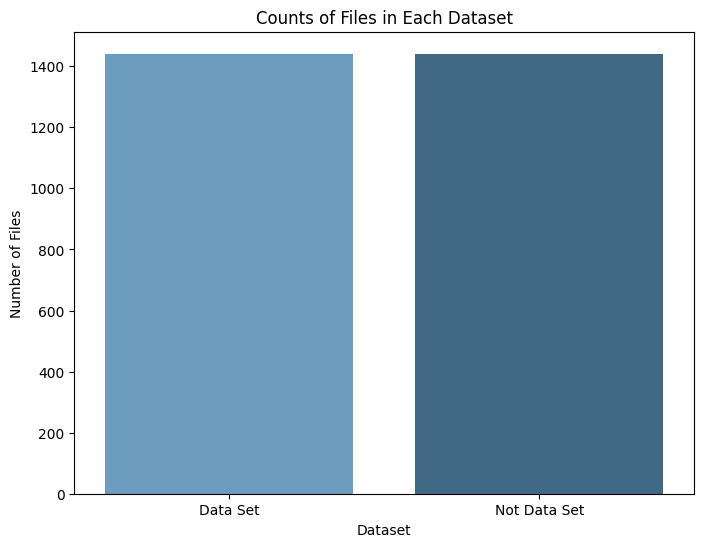

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define paths to the datasets
dataset1_path = r"Data Set"
dataset2_path = r"Not Data Set"

# Check if the paths exist to avoid FileNotFoundError
if os.path.exists(dataset1_path) and os.path.exists(dataset2_path):
    # Get the filenames from both directories
    dataset1_files = os.listdir(dataset1_path)
    dataset2_files = os.listdir(dataset2_path)

    # Create a DataFrame with the counts of files in each directory
    data = {
        'Dataset': ['Data Set', 'Not Data Set'],
        'Count': [len(dataset1_files), len(dataset2_files)]
    }

    df = pd.DataFrame(data)

    # Plot the counts as a bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Dataset', y='Count', data=df, palette="Blues_d")
    plt.title('Counts of Files in Each Dataset')
    plt.xlabel('Dataset')
    plt.ylabel('Number of Files')
    plt.show()
else:
    print("One or both of the directories do not exist. Please check the paths.")
